In [1]:
import pandas as pd
import re
from datetime import time
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper", font_scale=2.0)

In [2]:
data = pd.read_csv("data/times.summary", sep="\t")
data.time = data.time.transform(lambda x: pd.to_timedelta(x, unit='seconds'))
data.head()

,cpus,neoantigens,replica,time
0,1,10,1,0 days 00:05:23
1,1,10,2,0 days 00:05:10
2,1,10,3,0 days 00:04:57
3,1,10,4,0 days 00:04:52
4,1,10,5,0 days 00:04:52


In [3]:
data_no_wt = pd.read_csv("data/times_no_wt.summary", sep="\t")
data_no_wt.time = data_no_wt.time.transform(lambda x: pd.to_timedelta(x, unit='seconds'))
data_no_wt.head()

,cpus,neoantigens,replica,time
0,1,10,1,0 days 00:15:44
1,1,10,2,0 days 00:17:12
2,1,10,3,0 days 00:17:14
3,1,10,4,0 days 00:16:55
4,1,10,5,0 days 00:15:54


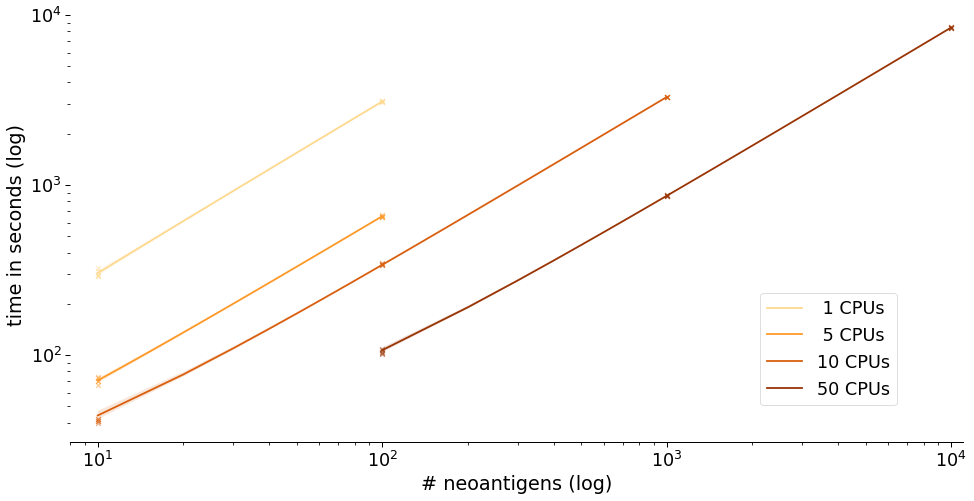

In [4]:
fig = plt.figure(figsize=(16,8))

scatter_kws={"alpha": 0.5, "marker":"+"}
ax = sns.regplot(x=data[data.cpus == 1].neoantigens, y=data[data.cpus == 1].time.astype('timedelta64[s]'), marker="x", scatter_kws=scatter_kws, color="#fed98e")
sns.regplot(x=data[data.cpus == 5].neoantigens, y=data[data.cpus == 5].time.astype('timedelta64[s]'), marker="x", scatter_kws=scatter_kws, color="#fe9929")
sns.regplot(x=data[data.cpus == 10].neoantigens, y=data[data.cpus == 10].time.astype('timedelta64[s]'), marker="x", scatter_kws=scatter_kws, color="#d95f0e")
sns.regplot(x=data[data.cpus == 50].neoantigens, y=data[data.cpus == 50].time.astype('timedelta64[s]'), marker="x", scatter_kws=scatter_kws, color="#993404")

sns.despine(left=True)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("# neoantigens (log)")
ax.set_ylabel("time in seconds (log)")
ax.set_xlim([8, 11000])
fig.legend(labels=[' 1 CPUs', ' 5 CPUs','10 CPUs', '50 CPUs'], loc='upper right',  bbox_to_anchor=(0.35, -0.1, 0.5, 0.5))
plt.savefig("figures/performance_time_1.jpg", dpi=200)

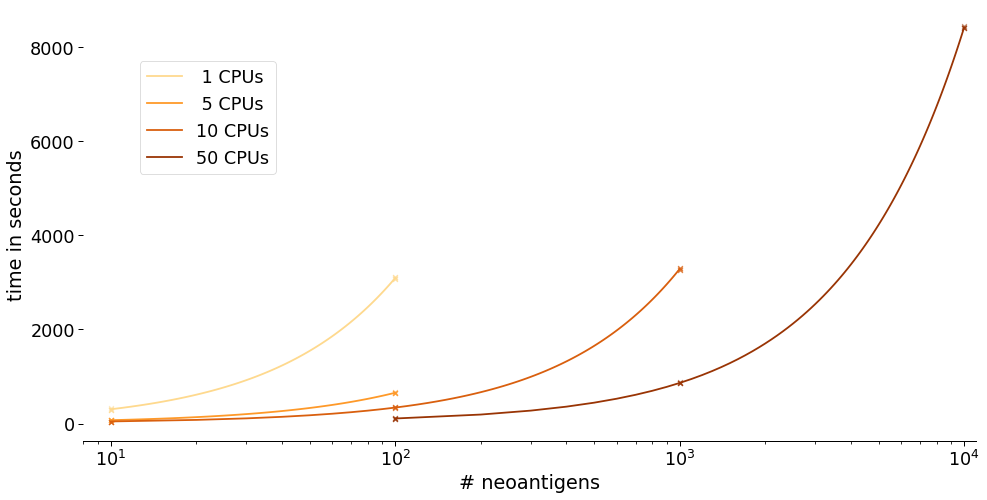

In [5]:
fig = plt.figure(figsize=(16,8))

scatter_kws={"alpha": 0.5, "marker":"+"}
ax = sns.regplot(x=data[data.cpus == 1].neoantigens, y=data[data.cpus == 1].time.astype('timedelta64[s]'), marker="x", scatter_kws=scatter_kws, color="#fed98e")
sns.regplot(x=data[data.cpus == 5].neoantigens, y=data[data.cpus == 5].time.astype('timedelta64[s]'), marker="x", scatter_kws=scatter_kws, color="#fe9929")
sns.regplot(x=data[data.cpus == 10].neoantigens, y=data[data.cpus == 10].time.astype('timedelta64[s]'), marker="x", scatter_kws=scatter_kws, color="#d95f0e")
sns.regplot(x=data[data.cpus == 50].neoantigens, y=data[data.cpus == 50].time.astype('timedelta64[s]'), marker="x", scatter_kws=scatter_kws, color="#993404")

sns.despine(left=True)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel("# neoantigens")
ax.set_ylabel("time in seconds")
ax.set_xlim([8, 11000])
fig.legend(labels=[' 1 CPUs', ' 5 CPUs','10 CPUs', '50 CPUs'], loc='upper right',  bbox_to_anchor=(-0.2, 0.3, 0.5, 0.5))
plt.savefig("figures/performance_time_2.jpg", dpi=200)

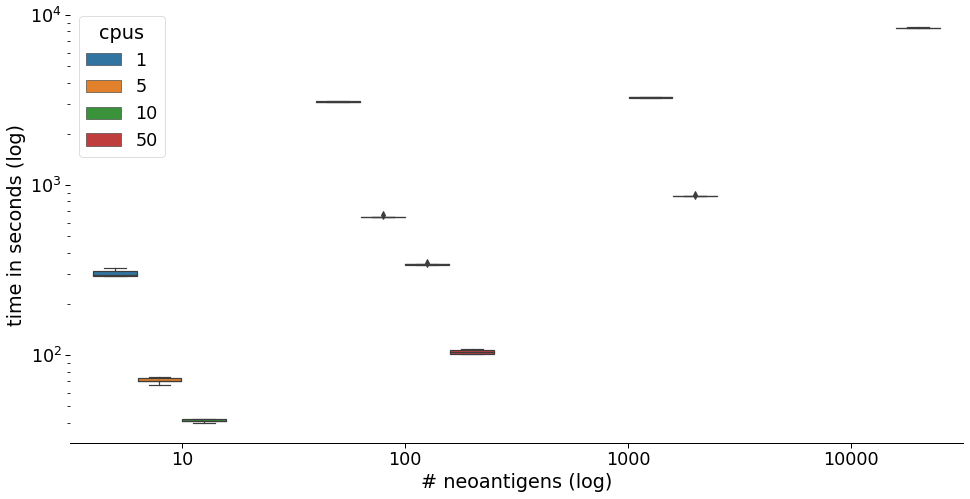

In [6]:
fig = plt.figure(figsize=(16,8))

scatter_kws={"alpha": 0.5, "marker":"+"}
ax = sns.boxplot(x=data.neoantigens, y=data.time.astype('timedelta64[s]'), hue=data.cpus)
#sns.boxplot(x=data[data.cpus == 5].neoantigens, y=data[data.cpus == 5].time.astype('timedelta64[s]'), color="#fe9929")
#sns.boxplot(x=data[data.cpus == 10].neoantigens, y=data[data.cpus == 10].time.astype('timedelta64[s]'), color="#d95f0e")
#sns.boxplot(x=data[data.cpus == 50].neoantigens, y=data[data.cpus == 50].time.astype('timedelta64[s]'), color="#993404")

sns.despine(left=True)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("# neoantigens (log)")
ax.set_ylabel("time in seconds (log)")
#ax.set_xlim([8, 11000])
#fig.legend(labels=[' 1 CPUs', ' 5 CPUs','10 CPUs', '50 CPUs'], loc='upper right',  bbox_to_anchor=(0.35, -0.1, 0.5, 0.5))
plt.savefig("figures/performance_time_3.jpg", dpi=200)

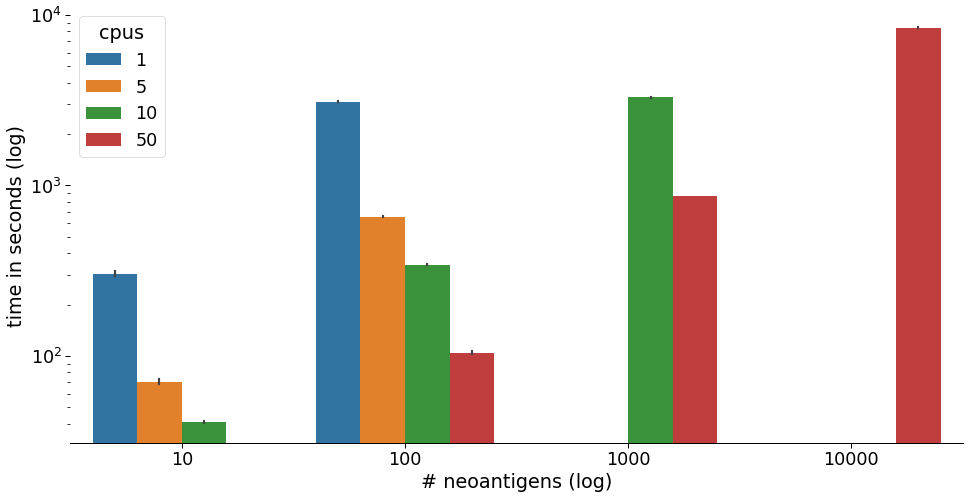

In [7]:
fig = plt.figure(figsize=(16,8))

scatter_kws={"alpha": 0.5, "marker":"+"}
ax = sns.barplot(x=data.neoantigens, y=data.time.astype('timedelta64[s]'), hue=data.cpus)
#sns.boxplot(x=data[data.cpus == 5].neoantigens, y=data[data.cpus == 5].time.astype('timedelta64[s]'), color="#fe9929")
#sns.boxplot(x=data[data.cpus == 10].neoantigens, y=data[data.cpus == 10].time.astype('timedelta64[s]'), color="#d95f0e")
#sns.boxplot(x=data[data.cpus == 50].neoantigens, y=data[data.cpus == 50].time.astype('timedelta64[s]'), color="#993404")

sns.despine(left=True)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("# neoantigens (log)")
ax.set_ylabel("time in seconds (log)")
#ax.set_xlim([8, 11000])
#fig.legend(labels=[' 1 CPUs', ' 5 CPUs','10 CPUs', '50 CPUs'], loc='upper right',  bbox_to_anchor=(0.35, -0.1, 0.5, 0.5))
plt.savefig("figures/performance_time_4.jpg", dpi=200)

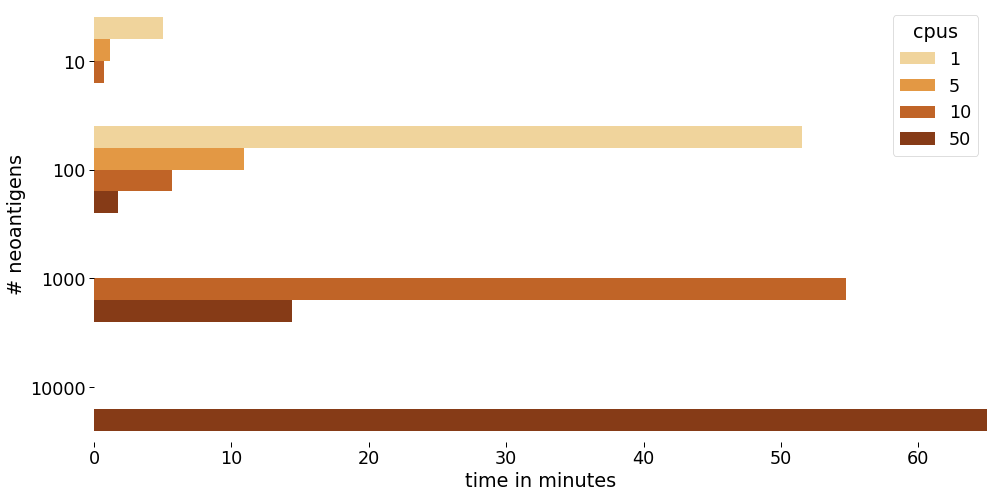

In [8]:
fig = plt.figure(figsize=(16,8))

scatter_kws={"alpha": 0.5, "marker":"+"}
ax = sns.barplot(y=data.neoantigens, x=data.time.transform(lambda d: float(d.total_seconds()) / 60), hue=data.cpus, 
                 orient="h", errwidth=0.0, palette=["#fed98e","#fe9929","#d95f0e","#993404"])


sns.despine(left=True, bottom=True)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel("# neoantigens")
ax.set_xlabel("time in minutes")
ax.set_xlim([0, 65])
plt.savefig("figures/performance_time_5.jpg", dpi=200)

In [9]:
data2 = pd.read_csv("data/memory.summary", sep="\t") #, names=["cpus", "neoantigens", "replica", "size"])
# add hour when missing
data2.head()

,cpus,neoantigens,replica,kilobytes
0,10,1000,0,381968
1,10,1000,1,371160
2,10,1000,2,369840
3,10,1000,3,369572
4,10,1000,4,370136


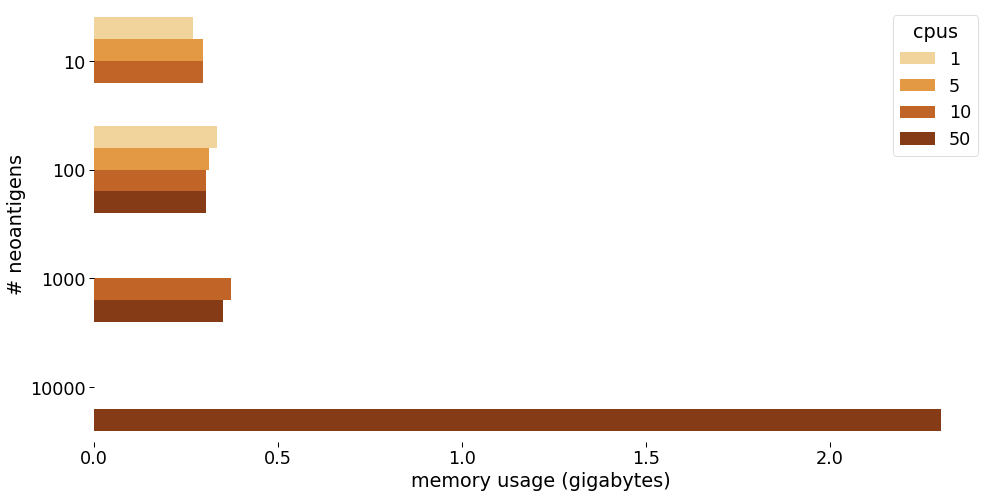

In [10]:
fig = plt.figure(figsize=(16,8))

#.transform(lambda d: float(d.total_seconds()) / 60)
scatter_kws={"alpha": 0.5, "marker":"+"}
ax = sns.barplot(y=data2.neoantigens, x=data2.kilobytes.transform(lambda d: float(d) / 1000000), hue=data2.cpus, 
                 orient="h", errwidth=0.0, palette=["#fed98e","#fe9929","#d95f0e","#993404"])


sns.despine(left=True, bottom=True)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel("# neoantigens")
ax.set_xlabel("memory usage (gigabytes)")
#ax.set_xlim([0, 65])
plt.savefig("figures/performance_memory_1.jpg", dpi=200)

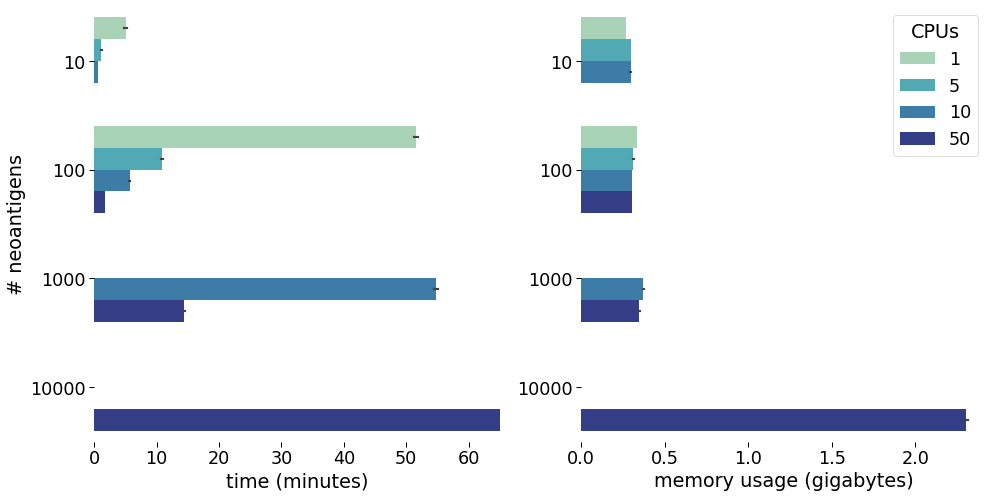

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(16,8))
colors = ["#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]


scatter_kws={"alpha": 0.5, "marker":"+"}
ax = sns.barplot(y=data.neoantigens, x=data.time.transform(lambda d: float(d.total_seconds()) / 60), hue=data.cpus, 
                 orient="h", palette=colors, ax=axs[0], ci="sd")  # errwidth=0.0
axs[0].set_ylabel("# neoantigens")
axs[0].set_xlabel("time (minutes)")
axs[0].set_xlim([0, 65])
axs[0].get_legend().remove()

scatter_kws={"alpha": 0.5, "marker":"+"}
sns.barplot(y=data2.neoantigens, x=data2.kilobytes.transform(lambda d: float(d) / 1000000), hue=data2.cpus, 
                 orient="h", palette=colors, ax=axs[1])  # errwidth=0.0,
axs[1].set_ylabel(None)
axs[1].set_xlabel("memory usage (gigabytes)")
axs[1].legend().set_title("CPUs")
#axs[1].legend().set_frame_on(False)
#axs[1].legend().set_labels([" 1 CPU", " 5 CPUs", " 10 CPUs", " 50 CPUs"])


#fig.legend(labels=[' 1 CPU', ' 5 CPUs','10 CPUs', '50 CPUs'], colors=["#fed98e","#fe9929","#d95f0e","#993404"], loc='upper right',  bbox_to_anchor=(0.35, -0.1, 0.5, 0.5))
sns.despine(left=True, bottom=True)

plt.savefig("figures/performance_1.jpg", dpi=200)

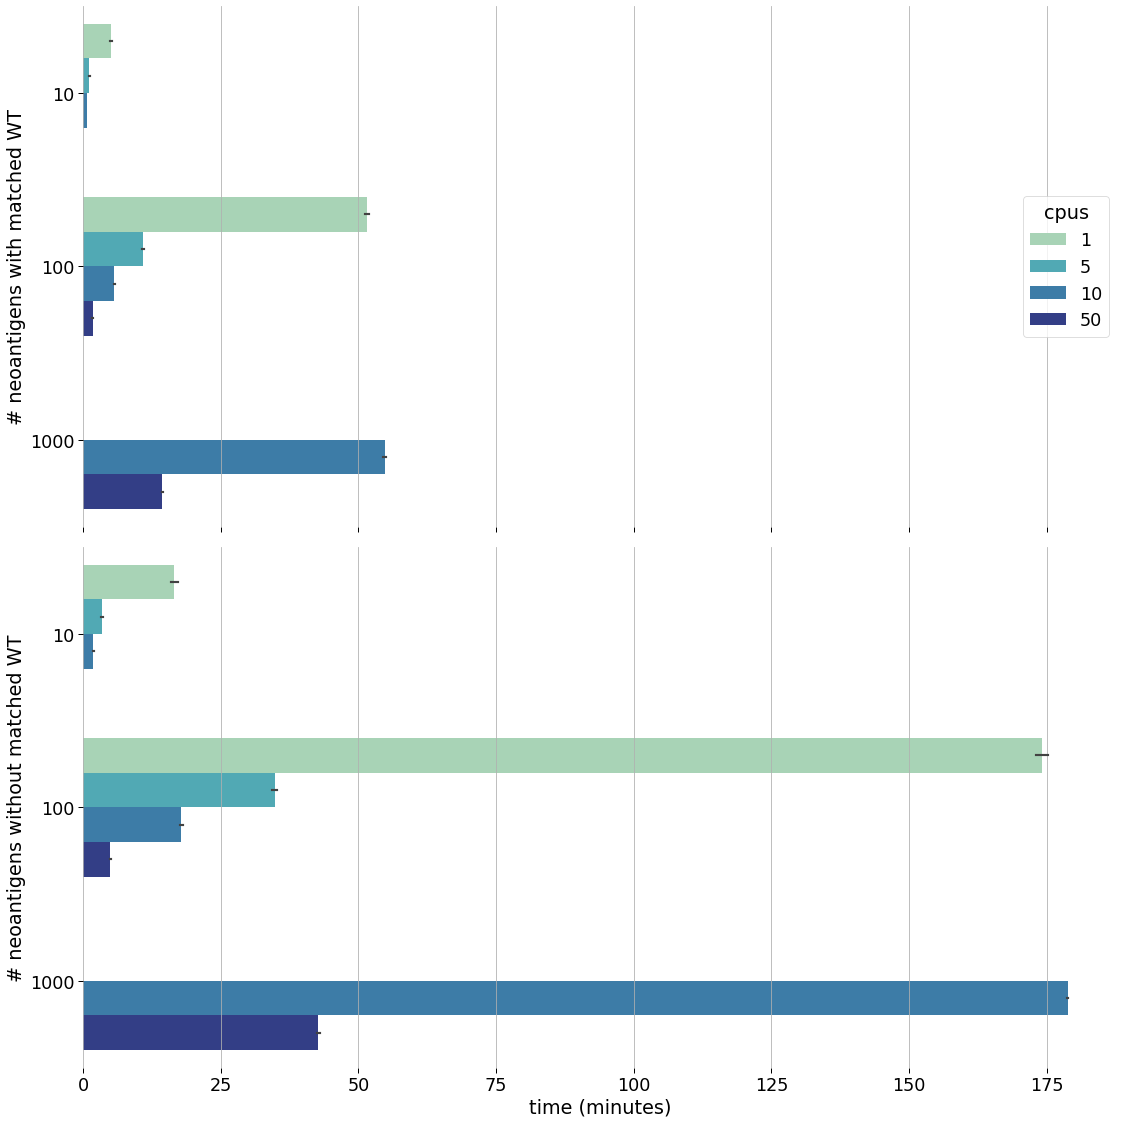

In [12]:
fig, axs = plt.subplots(nrows=2, figsize=(16,16), sharex=True)
colors = ["#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]

scatter_kws={"alpha": 0.5, "marker":"+"}

ax = sns.barplot(y=data[data.neoantigens != 10000].neoantigens, 
                 x=data[data.neoantigens != 10000].time.transform(lambda d: float(d.total_seconds()) / 60), 
                 hue=data[data.neoantigens != 10000].cpus, 
                 orient="h", palette=colors, ax=axs[0], ci="sd")  # errwidth=0.0
axs[0].set_ylabel("# neoantigens with matched WT")
axs[0].set_xlabel("")
#axs[0].set_xlim([0, 65])


ax = sns.barplot(y=data_no_wt.neoantigens, x=data_no_wt.time.transform(lambda d: float(d.total_seconds()) / 60), hue=data_no_wt.cpus, 
                 orient="h", palette=colors, ax=axs[1], ci="sd")  # errwidth=0.0
axs[1].set_ylabel("# neoantigens without matched WT")
axs[1].set_xlabel("time (minutes)")
axs[1].get_legend().remove()

sns.despine(left=True, bottom=True)

axs[0].grid(axis="x")
axs[1].grid(axis="x")
plt.tight_layout()


plt.savefig("figures/performance_1_no_wt.jpg", dpi=200)

In [13]:
average_times = data.time.transform(lambda d: d.total_seconds()) / (data.neoantigens / data.cpus)
average_times #[average_times < 10]

0     32.300
1     31.000
2     29.700
3     29.200
4     29.200
5     36.500
6     37.000
7     35.000
8     33.500
9     35.000
10    42.000
11    42.000
12    41.000
13    40.000
14    41.000
15    31.230
16    31.060
17    30.740
18    30.950
19    30.680
20    33.400
21    32.600
22    32.500
23    32.550
24    32.500
25    34.700
26    34.100
27    34.000
28    34.000
29    34.200
30    54.000
31    51.000
32    53.500
33    52.000
34    50.500
35    33.060
36    32.840
37    32.670
38    32.680
39    33.060
40    43.750
41    43.350
42    43.100
43    42.900
44    43.200
45    42.060
46    42.160
47    42.055
48    42.230
49    42.060
dtype: float64

In [14]:
average_times.mean()

37.515699999999995

In [15]:
average_times.std()

6.738682122262332

In [16]:
average_times_no_wt = data_no_wt.time.transform(lambda d: d.total_seconds()) / (data_no_wt.neoantigens / data_no_wt.cpus)

In [17]:
average_times_no_wt.mean()

111.47685714285716

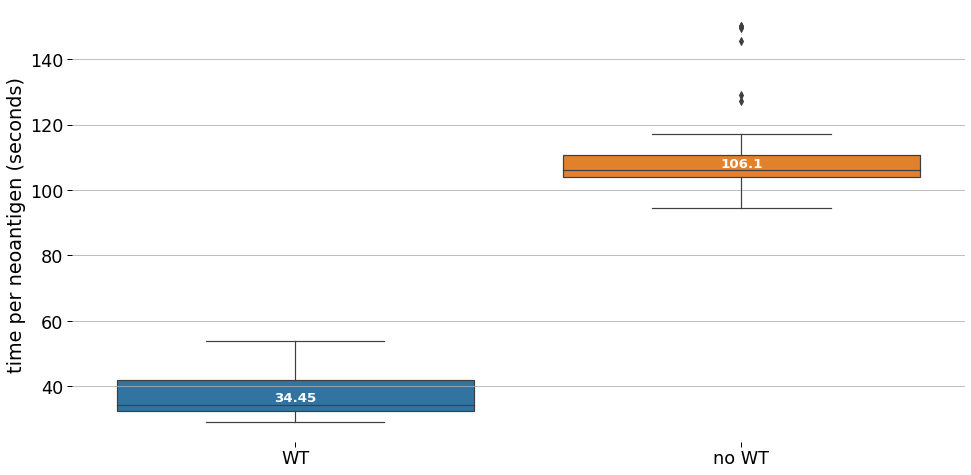

In [18]:
fig = plt.figure(figsize=(16,8))
times_with_wt = pd.DataFrame(average_times, columns=["time"])
times_with_wt["mode"] = "WT"
times_without_wt = pd.DataFrame(average_times_no_wt, columns=["time"])
times_without_wt["mode"] = "no WT"
times = pd.concat([times_with_wt, times_without_wt])
times.head()
fig = sns.boxplot(data=times, y="time", x="mode")
fig.set_ylabel("time per neoantigen (seconds)")
fig.set_xlabel(None)
sns.despine(bottom=True, left=True)
fig.grid(axis="y")

medians = times.groupby(['mode'])['time'].median()
vertical_offset = times['time'].median() * 0.02 # offset from median for display

for xtick in fig.get_xticks():
    fig.text(xtick, medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')


plt.savefig("figures/performance_wt_vs_no_wt_boxplot.jpg", dpi=200)

In [19]:
average_times_no_wt.std()

15.322120643318382